In [171]:
import pandas as pd
from plotting import plot
from time_mean import mean_in_time
from pandas.plotting import register_matplotlib_converters
import numpy as np
from app_mask import apply_mask
from cross_corr import crosscorr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
import seaborn as sns
import matplotlib.dates as mdates


In [68]:
df_inf= pd.read_csv('data/inflation.csv', sep=",")
df_mb= pd.read_csv('data/cmonetary_base.csv', sep=",",thousands='.',dtype={'Monetary Base':np.int32})
df_mb=mean_in_time(df_mb,"1M")

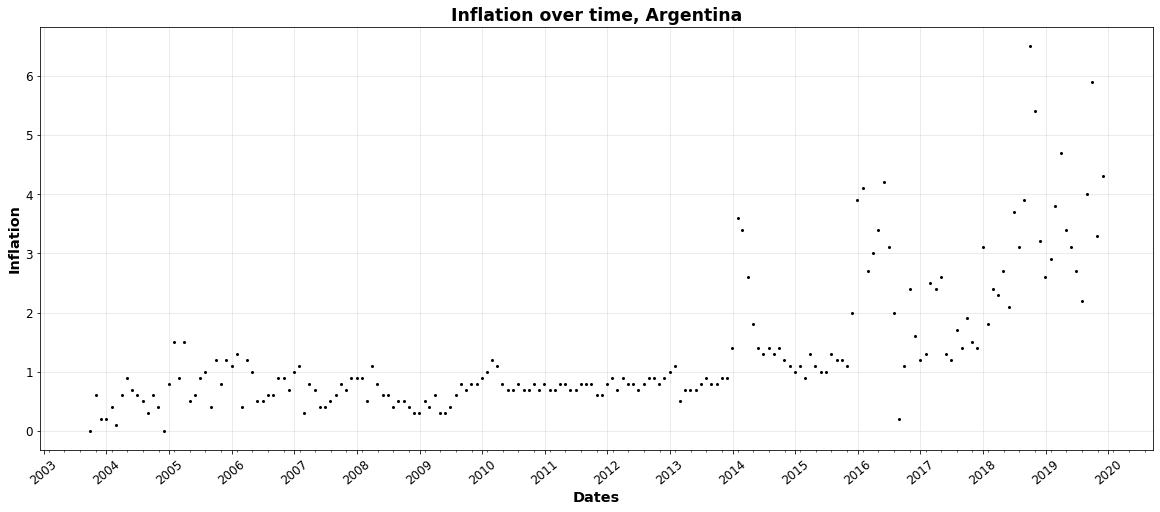

In [69]:
plot(df_inf,'2003-09-10',"2019-12-19",False)

In [70]:
df_mb['CMonetary Base']=df_mb['CMonetary Base'].diff(periods = 1)
df_mb=df_mb.rename(columns={"CMonetary Base":"delta CMonetary Base"})
df_mb=apply_mask(df_mb,'2003-09-10','2019-12-19')

df_inf=apply_mask(df_inf,'2003-09-10','2019-12-19')


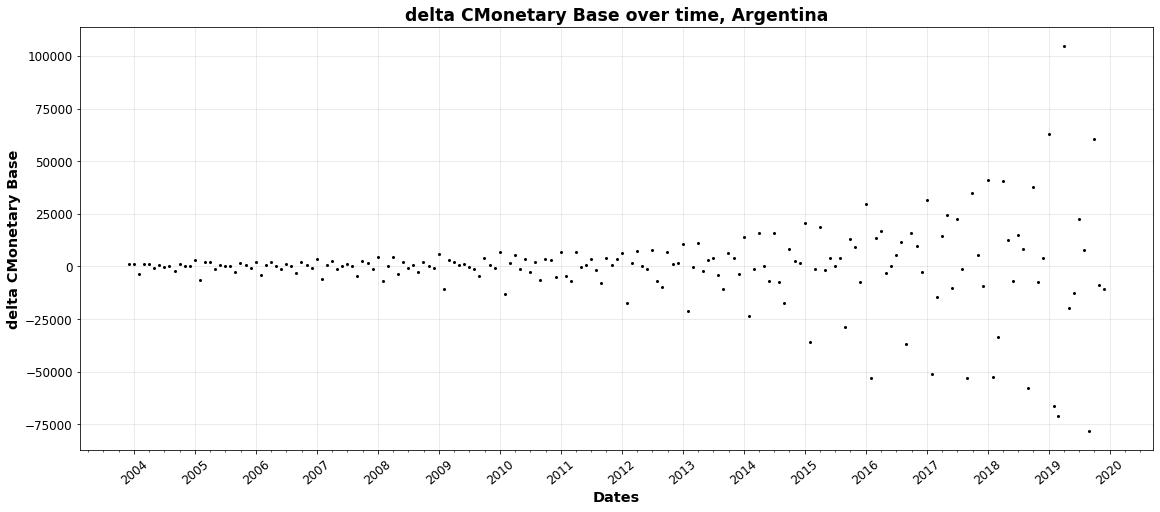

In [65]:
plot(df_mb,'2003-09-10',"2019-12-19",False)

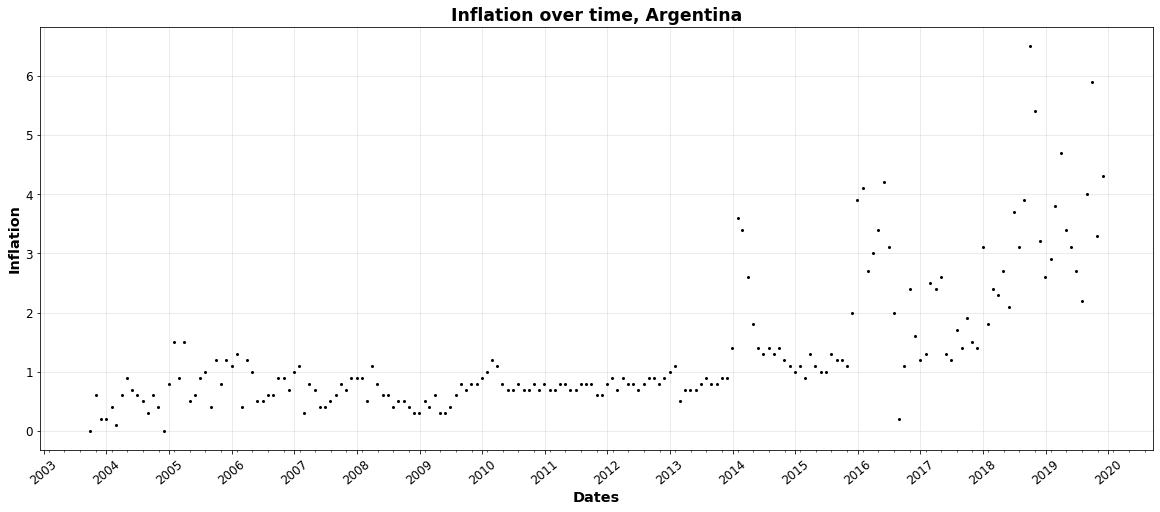

In [53]:
plot(df_inf,'2003-09-10',"2019-12-19",False)

Pearson Coefficient

In [73]:
pearsonr(df_mb['delta CMonetary Base'].values,df_inf['Inflation'].values)

(0.11100095145612594, 0.12238104913947094)

Pearson with window

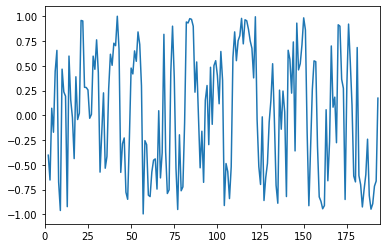

In [76]:
window=4 #in months
d1=df_mb['delta CMonetary Base'].reset_index().drop(['index'],axis=1)
d2=df_inf['Inflation'].reset_index().drop(['index'],axis=1)
rolling_r=d1['delta CMonetary Base'].rolling(window=window,center=True).corr(d2['Inflation'])
rolling_r.plot()

shifted pearson

In [10]:
rs = [crosscorr(d1,d2, lag) for lag in np.arange(-3,3,1)]

[0.303737525324892,
 0.33366044101035564,
 0.1583850288366829,
 0.11100095145612594,
 0.10572745870091281,
 0.16755576509021458]

Rolling window time lagged cross correlation

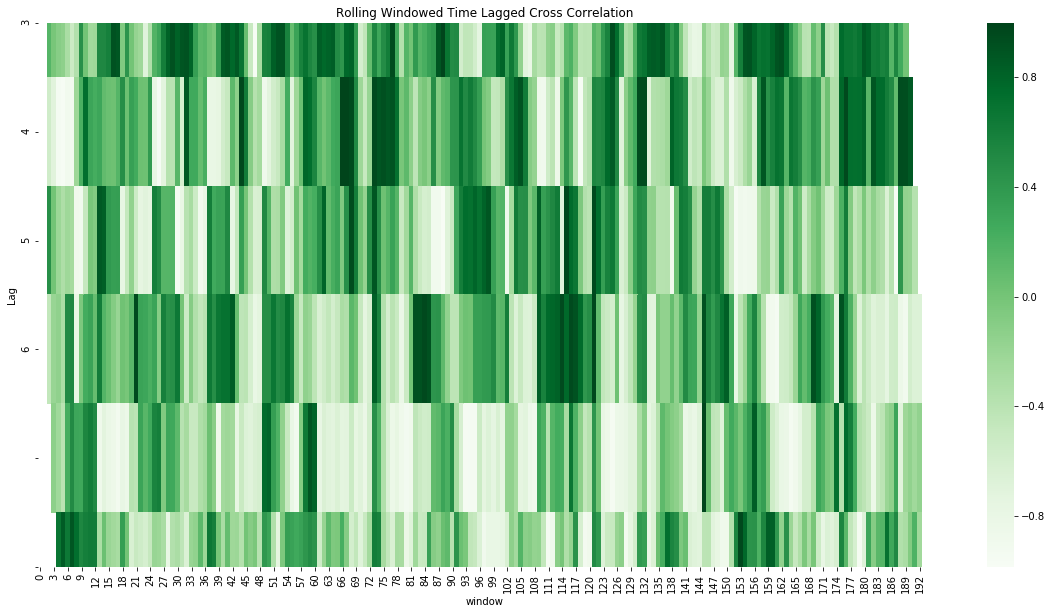

In [175]:
window_size = 5 #months


rss=pd.DataFrame(d1['delta CMonetary Base'].rolling(window=window_size,center=True).corr(d2['Inflation'].shift(lag)) for lag in np.arange(-3,3,1))

f,ax = plt.subplots(figsize=(20,10))

sns.heatmap(rss,cmap='Greens',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation', xlabel='window',ylabel='Lag')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_yticklabels([3, 4, 5, 6]);
myFmt = mdates.DateFormatter('%d')


plt.show()